### Group: SAXA 4
### Bassma Ali · Andrew Singh · Andy Oliver · Destiny Floyd-McGuiness . Vahid Dabbaghi Sadr

### EDA part 1:
* #### early insights from studying the meta data and "2024-Federal-AI-Use-Case-Inventory" :

### 🧩 Step 1 – Identify and label columns before the target (`17_impact_type`)

#### Goal
Before deciding what to drop, classify every feature that appears **before** the label into high-level analytic categories. This keeps signal-bearing fields (like text narratives) while safely removing purely administrative/descriptive identifiers.

---

### 1️⃣ Columns before the label (in `case_dat_standardized`)
| YAML Code          | Suggested Category     | Rationale |
|--------------------|------------------------|-----------|
| 2_use_case_name    | **Context / Metadata** | Title/identifier; not a model feature. |
| 3_agency           | **Context / Metadata** | High-level agency name (identifier). |
| 4_bureau           | **Context / Metadata** | Sub-agency/bureau (identifier). |
| 8_topic_area       | **Context / Metadata** | Broad topical class (useful if encoded). |
| 10_commercial_ai   | **Context / Metadata** | Commercial vs. custom; simple categorical. |
| 11_purpose_benefits| **Narrative (Text)**   | Qualitative purpose/benefits; key for NLP. |
| 12_outputs         | **Narrative (Text)**   | Free-text outputs; key for NLP. |
| 16_dev_stage       | **Context / Metadata** | Development stage; categorical. |
| 17_impact_type     | **Target Label**       | Rights-/safety-impacting indicator. |

---

### 2️⃣ Interpretation
- **Keep (likely):**  
  - `11_purpose_benefits`, `12_outputs` — rich textual signal for NLP/classification.  
  - Optionally `8_topic_area`, `16_dev_stage` — lightweight structured predictors.
- **Drop or limit (likely):**  
  - `2_use_case_name`, `3_agency`, `4_bureau` — administrative IDs (risk of leakage, low generalizability).  
  - `10_commercial_ai` — keep only if you expect a substantive link to the label.

---

### 3️⃣ Next Step
Use this categorization to guide cleaning and row filtering:
1. Tag these columns with a `feature_category` (Context, Narrative, Target).
2. **Then** assess row missingness **within the kept features only**.
3. Proceed to Step 2 — quantify how many records lack values **after** `17_impact_type`.


### 🧩 Step 2 – Identify and label columns after the target (`17_impact_type`)

### Goal
Now that the target variable (`17_impact_type`) is defined, we’ll categorize all **subsequent columns** in `case_dat_standardized` to understand which capture policy-relevant signals (e.g., governance, compliance, or operational characteristics) and which might be redundant or sparse.  
This helps us later when we evaluate missingness and decide which records are informative enough to keep.

---

### 1️⃣ Columns after the label

| YAML Code | Suggested Category | Rationale |
|------------|--------------------|------------|
| 18_date_initiated | **Context / Metadata** | When the AI initiative started — temporal marker. |
| 19_date_acq_dev_began | **Context / Metadata** | Start of acquisition/development phase. |
| 20_date_implemented | **Context / Metadata** | Implementation completion date. |
| 21_date_retired | **Context / Metadata** | When the system was retired or decommissioned. |
| 22_dev_method | **Governance / Operational** | Whether the system was built in-house or via contract. |
| 23_contract_piids | **Governance / Operational** | Procurement identifiers; procedural detail. |
| 24_hisp_support | **Context / Metadata** | Whether tied to a High-Impact Service Provider. |
| 25_hisp_name | **Context / Metadata** | Name of the specific HISP service. |
| 26_public_service | **Context / Metadata** | Public-facing service supported. |
| 27_public_info | **Governance / Transparency** | Indicates if information is publicly shared. |
| 28_iqa_compliance | **Governance / Compliance** | Information Quality Act compliance indicator. |
| 29_contains_pii | **Governance / Compliance** | Whether personally identifiable information (PII) is used. |
| 30_saop_review | **Governance / Compliance** | Privacy risk review by Senior Agency Official for Privacy (SAOP). |
| 31_data_catalog | **Governance / Data Management** | Access to data catalog or repository. |
| 33_agency_data | **Governance / Data Management** | Agency-owned training or evaluation data. |
| 34_data_docs | **Governance / Data Management** | Availability of documentation for training/evaluation data. |
| 35_demo_features | **Governance / Fairness** | Whether demographic features are used in the model. |
| 37_custom_code | **Operational / Technical** | Whether custom code is involved. |
| 38_code_access | **Governance / Transparency** | Agency access to model code. |
| 39_code_link | **Governance / Transparency** | Link to public/open-source code (if available). |
| 40_has_ato | **Governance / Compliance** | Whether an Authority to Operate (ATO) exists. |
| 41_system_name | **Context / Metadata** | Internal system identifier. |
| 42_dev_tools_wait | **Operational / Technical** | Wait time for development tools. |
| 43_infra_provisioned | **Operational / Technical** | How IT infrastructure is provisioned. |
| 45_compute_request | **Operational / Technical** | Process for requesting compute resources. |
| 47_timely_resources | **Operational / Governance** | Timeliness of resource provisioning. |
| 49_existing_reuse | **Operational / Efficiency** | Degree of re-use of existing tools/infrastructure. |
| 50_internal_review | **Governance / Oversight** | Whether an internal review occurred. |
| 51_extension_request | **Governance / Oversight** | Request for implementation extension. |
| 52_impact_assessment | **Governance / Oversight** | Whether an AI impact assessment has been completed. |
| 53_real_world_testing | **Governance / Validation** | Real-world or operational testing conducted. |
| 54_key_risks | **Narrative (Text)** | Free-text listing of key risks — rich for NLP. |
| 55_independent_eval | **Governance / Oversight** | Whether independent evaluation occurred. |
| 56_monitor_postdeploy | **Governance / Oversight** | Post-deployment performance monitoring. |
| 57_autonomous_impact | **Governance / Safety** | Potential for autonomous action with human impact. |
| 59_ai_notice | **Governance / Transparency** | Whether users are notified they interact with AI. |
| 61_adverse_impact | **Governance / Fairness** | Whether potential adverse impacts were identified. |
| 62_disparity_mitigation | **Governance / Fairness** | Actions to mitigate demographic disparities. |
| 63_stakeholder_consult | **Governance / Inclusiveness** | Whether affected groups were consulted. |
| 65_appeal_process | **Governance / Accountability** | Process for appeals or contesting decisions. |
| 66_no_appeal_reason | **Governance / Accountability** | Reason for no appeal process (if missing). |
| 67_opt_out | **Governance / Rights** | Whether users can opt out in favor of a human alternative. |

---

### 2️⃣ Interpretation

- **High-value predictors:**  
  - *Governance & Compliance* fields (50–67 range) — oversight, accountability, fairness, and rights protections.  
    These often correlate with the label `17_impact_type` and will likely serve as important predictors.  
  - *Narrative text* (`54_key_risks`) — potential for NLP analysis.  

- **Lower-value / Descriptive fields:**  
  - *Context & Metadata* (18–21, 24–26, 41) — purely descriptive or temporal; may be kept for auditing but dropped from modeling if not predictive.  

- **Sparse or procedural fields:**  
  - *Operational / Technical* (42–49) — may have many NaNs; evaluate completeness before retaining.

---

### 3️⃣ Next Step
1. Quantify **missingness** for each post-impact feature category.  
2. Identify records with **no non-null values** across these columns — candidates for removal before modeling.  
3. Visualize missingness patterns (e.g., bar chart or heatmap) to assess where data density drops off.


 ***

***

In [11]:
# set up page for EDA (impot basic packages required for EDA)
import pandas as pd # for data ops
import numpy as np  # for numeric ops

# visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# read data
data = pd.read_csv("case_dat_standardized.yamlcols.csv")

data.head(2)

,2_use_case_name,3_agency,3_abr,4_bureau,8_topic_area,8_question_type,10_commercial_ai,11_purpose_benefits,12_outputs,16_dev_stage,...,59_ai_notice,63_question_type,61_adverse_impact,62_disparity_mitigation,63_stakeholder_consult,67_question_type,65_appeal_process,66_no_appeal_reason,67_opt_out,47_question_type.1
0,Non-Intrusive Inspection (NII) 3D Imaging Tool,Department of Homeland Security,DHS,CBP,Law & Justice,NaN,None of the above.,"Utilizes AI/ML to generate high resolution, ra...",Detection alerts for Items of Interest.,Implementation and Assessment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Babel,Department of Homeland Security,DHS,CBP,Law & Justice,NaN,None of the above.,CBP uses this tool to conduct targeted queries...,Babel utilizes AI modules for Text detection a...,Implementation and Assessment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# data dimentions
data.shape

(2133, 62)

### 🧩 Step 3 – Understanding Missingness

#### Goal
Instead of inspecting missingness one column at a time, we’ll take a **layered approach** that starts with broad data structure insights and narrows down to specific problem areas.

This approach balances interpretability and efficiency in a high-dimensional dataset.

---

#### 1️⃣ Layer 1 — Macro-Level Overview
**Objective:** Get a general sense of completeness across the entire dataset.

**What to do:**
- Use `df.isna().mean()` to compute the **percentage of missing values per column**.
- Visualize with a horizontal barplot for the top N columns with the highest missingness.
- Use `missingno.matrix(df)` for a quick structural view (where missing fields cluster).

**Why:**
Shows which parts of the schema are sparsely populated (e.g., post-implementation governance vs. pre-implementation metadata).

---

#### 2️⃣ Layer 2 — Section-Level Missingness
**Objective:** Assess missingness by logical feature groups rather than by individual column.

**What to do:**
- Group columns by your earlier categories:
  - Context & Metadata  
  - Narrative (Text)  
  - Governance & Compliance  
  - Operational / Technical  
- For each group, calculate the **average proportion of missing values**.
- Visualize using a small grouped bar chart.

**Why:**
Reveals which categories of variables (e.g., governance vs. narrative) are systematically underreported.

---

#### 3️⃣ Layer 3 — Record-Level Completeness
**Objective:** Identify rows (use cases) that are mostly empty.

**What to do:**
- Compute the proportion of non-null cells **per record**:
  ```python
  completeness = case_dat_std.notna().mean(axis=1)


In [14]:
# layer 1, macro level misingness check:
missing_pct = data.isna().mean().sort_values(ascending = False) * 100

# get quick summaries
print(f"data set shape:{data.shape}")                                                  # data set dimension
print(f"average missingness:{missing_pct.mean():.1f}%")                               # avergae missingness
print(f"number of columns with > 50% missing values:{(missing_pct > 50).sum()}")       # number of columns wit 50+ % missing values


data set shape:(2133, 62)
average missingness:62.1%
number of columns with > 50% missing values:40


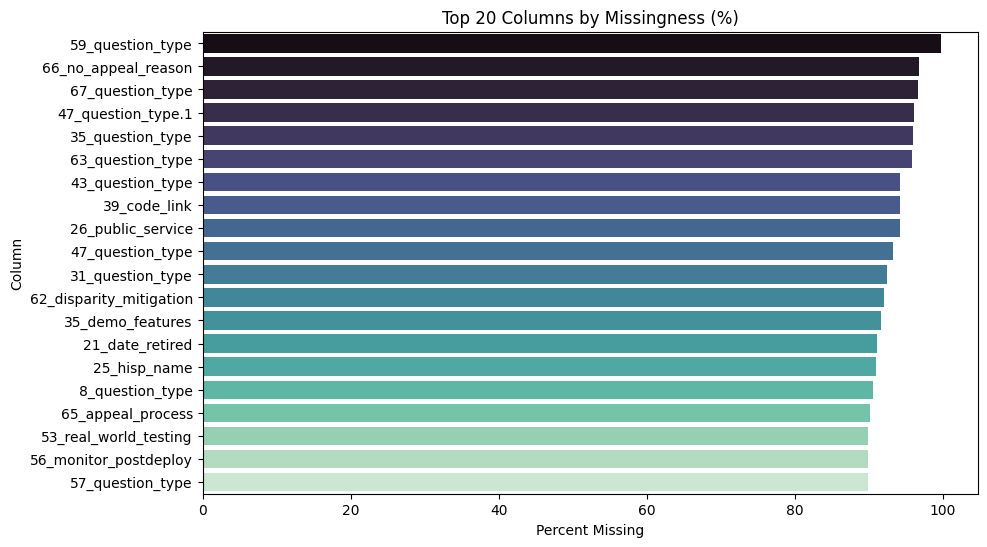

In [15]:
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_pct.head(top_n),
    y=missing_pct.head(top_n).index,
    hue=missing_pct.head(top_n).index,   # use column names as hue
    palette="mako",
    legend=False)
plt.title(f"Top {top_n} Columns by Missingness (%)")
plt.xlabel("Percent Missing")
plt.ylabel("Column")
plt.show()

<Figure size 1200x500 with 0 Axes>

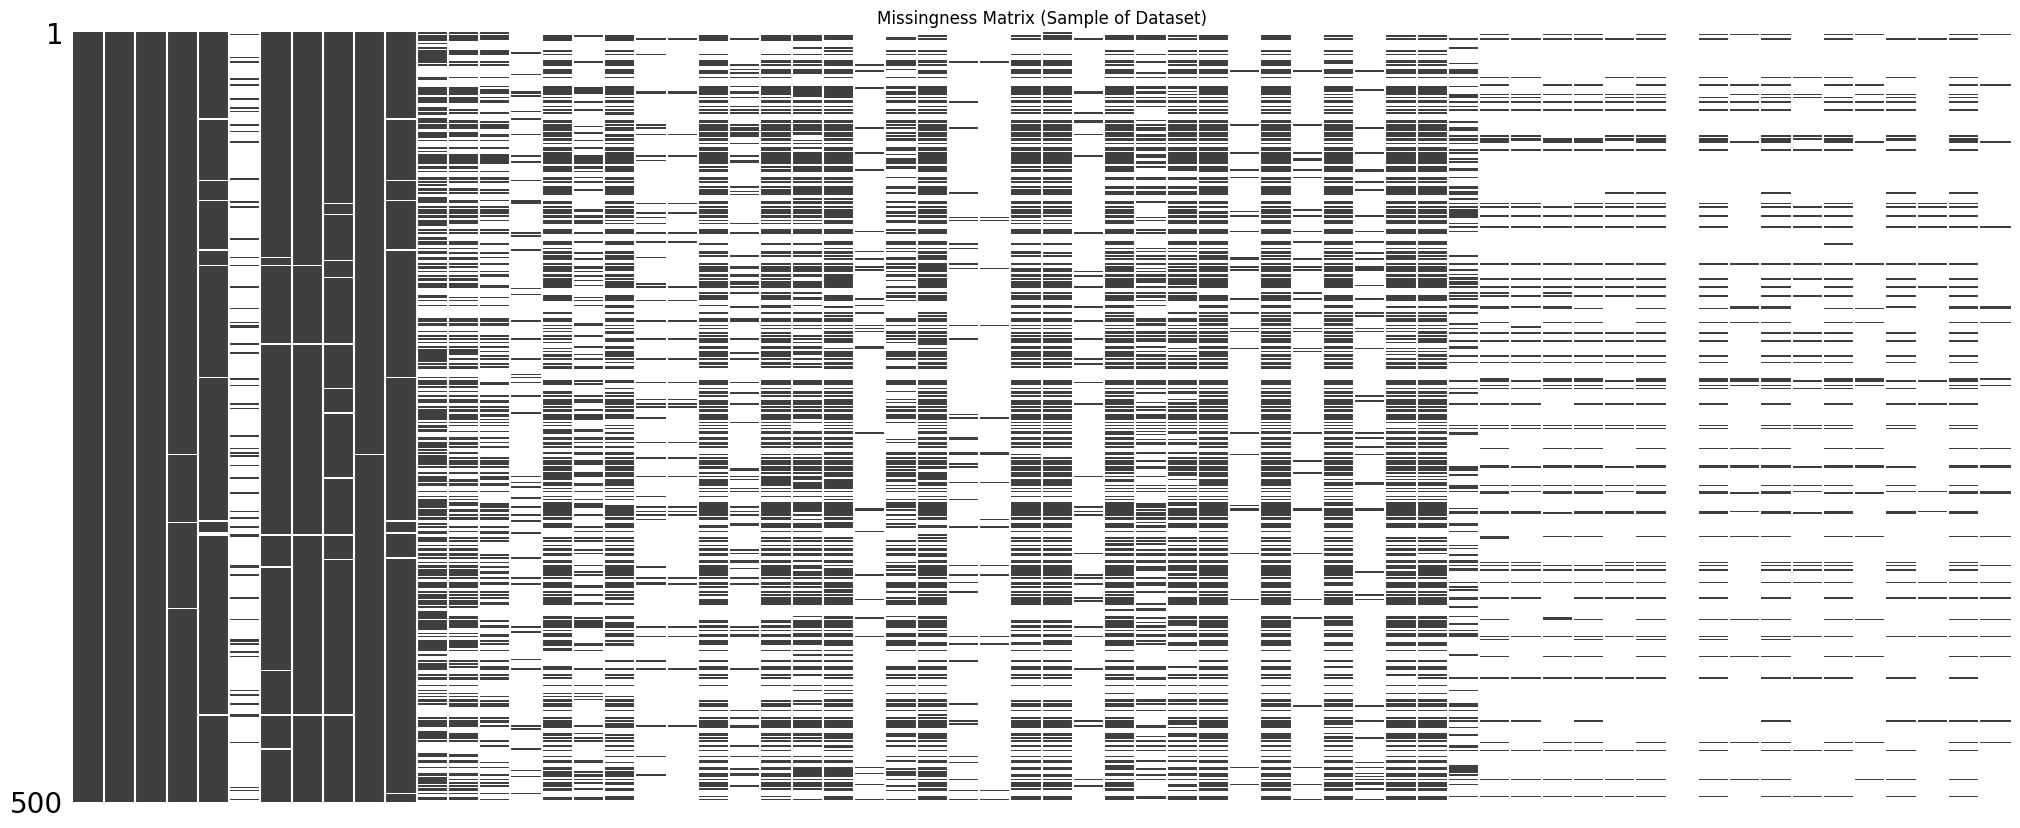

In [16]:
# install and import missingno
!pip install missingno
import missingno as msno

# Structural view of missingness patterns
plt.figure(figsize=(12, 5))
msno.matrix(data.sample(min(500, len(data))), sparkline=False)
plt.title("Missingness Matrix (Sample of Dataset)")
plt.show()

### Interpreting the Missingness Matrix

The plot shows that **most missing values (white areas)** appear **to the right of the `17_impact_type` column**, confirming that post-label fields—mainly **governance, compliance, and operational variables**—are sparsely filled.  

In contrast, the **left side of the plot** (metadata and descriptive fields) is mostly complete, indicating that agencies consistently reported basic information but often left advanced oversight questions blank.  

This pattern supports performing **section-level missingness analysis** next, to quantify completeness by feature category.


---

#### Step 4 – Layer 2: Section-Level Missingness Analysis

#### Goal
Quantify missingness by logical feature groups (Context & Metadata, Narrative Text, Governance & Compliance, Operational / Technical).  
This provides a clearer picture of which sections of the schema are least complete.

In [17]:
# 1) Map columns → feature category (keys must match your actual column names)
feature_categories = {
    # Context & Metadata
    '2_use_case_name':'Context & Metadata','3_agency':'Context & Metadata','4_bureau':'Context & Metadata',
    '8_topic_area':'Context & Metadata','10_commercial_ai':'Context & Metadata','16_dev_stage':'Context & Metadata',
    '18_date_initiated':'Context & Metadata','19_date_acq_dev_began':'Context & Metadata',
    '20_date_implemented':'Context & Metadata','21_date_retired':'Context & Metadata',
    '24_hisp_support':'Context & Metadata','25_hisp_name':'Context & Metadata','26_public_service':'Context & Metadata',
    '41_system_name':'Context & Metadata',

    # Narrative (Text)
    '11_purpose_benefits':'Narrative (Text)','12_outputs':'Narrative (Text)','54_key_risks':'Narrative (Text)',

    # Governance & Compliance
    '22_dev_method':'Governance & Compliance','23_contract_piids':'Governance & Compliance','27_public_info':'Governance & Compliance',
    '28_iqa_compliance':'Governance & Compliance','29_contains_pii':'Governance & Compliance','30_saop_review':'Governance & Compliance',
    '31_data_catalog':'Governance & Compliance','33_agency_data':'Governance & Compliance','34_data_docs':'Governance & Compliance',
    '35_demo_features':'Governance & Compliance','38_code_access':'Governance & Compliance','39_code_link':'Governance & Compliance',
    '40_has_ato':'Governance & Compliance','50_internal_review':'Governance & Compliance','51_extension_request':'Governance & Compliance',
    '52_impact_assessment':'Governance & Compliance','53_real_world_testing':'Governance & Compliance',
    '55_independent_eval':'Governance & Compliance','56_monitor_postdeploy':'Governance & Compliance',
    '57_autonomous_impact':'Governance & Compliance','59_ai_notice':'Governance & Compliance',
    '61_adverse_impact':'Governance & Compliance','62_disparity_mitigation':'Governance & Compliance',
    '63_stakeholder_consult':'Governance & Compliance','65_appeal_process':'Governance & Compliance',
    '66_no_appeal_reason':'Governance & Compliance','67_opt_out':'Governance & Compliance',

    # Operational / Technical
    '37_custom_code':'Operational / Technical','42_dev_tools_wait':'Operational / Technical',
    '43_infra_provisioned':'Operational / Technical','45_compute_request':'Operational / Technical',
    '47_timely_resources':'Operational / Technical','49_existing_reuse':'Operational / Technical'
}

# create a new data frame with two columns; first column includes feature name and secong rate of missing value
missingness = (data.isna().mean()
               .rename("missing_rate")
               .reset_index()
               .rename(columns = {"index":"columns"})
              )

missingness.head(2)

,columns,missing_rate
0,2_use_case_name,0.0
1,3_agency,0.0


In [18]:
# insert the category column and map that to feature categories
missingness["category"] = missingness["columns"].map(feature_categories).fillna("unlabeled")

# aggregate missingness by category
category_missing = missingness.groupby("category", dropna = False)["missing_rate"].mean().sort_values(ascending = False)

category_missing.head()


,missing_rate
category,
unlabeled,0.788990
Governance & Compliance,0.731295
Operational / Technical,0.470933
Context & Metadata,0.395285
Narrative (Text),0.306142


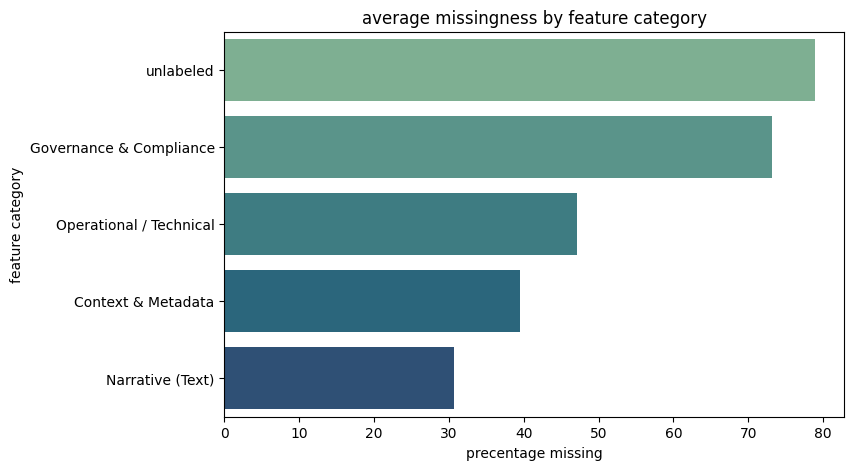

In [19]:
# plot
plt.figure(figsize = (8, 5))
sns.barplot( x = category_missing.values*100, y = category_missing.index, hue = category_missing.index,  palette = "crest")
plt.title("average missingness by feature category")
plt.xlabel("precentage missing")
plt.ylabel("feature category")
plt.show()

In [20]:
set(data.columns) - set(feature_categories.keys())


{'17_impact_type',
 '31_question_type',
 '35_question_type',
 '3_abr',
 '43_question_type',
 '47_question_type',
 '47_question_type.1',
 '57_question_type',
 '59_question_type',
 '63_question_type',
 '67_question_type',
 '8_question_type'}

In [21]:
# cacluate missingness in the target variable
target_na = data["17_impact_type"].isna().sum()

print(f" number of NAs in target var: {target_na}")
print(f"% of NAs in target variable:{(target_na/data.shape[0])*100:.2f}%")

 number of NAs in target var: 39
% of NAs in target variable:1.83%


In [22]:
# sanity check
data["17_impact_type"].value_counts(dropna = False)

,count
17_impact_type,
Neither,1722
Both,195
Rights-Impacting\n,131
NaN,39
Safety-impacting,20
"No, use case is too new to fully assess impacts; will be reassessed before end of initiation stage.",12
"No, use case is too new to fully assess impacts; will be reassessed before end of acquisition and development stage.",8
Safety-Impacting,5
Case-by-case assessment,1


In [23]:
# standardize target categories
data['17_impact_type_clean'] = (
    data['17_impact_type']
    .str.strip()   # remove whitespace / newlines
    .replace({
        'Rights-Impacting\n': 'Rights-Impacting',
        'Safety-impacting': 'Safety-Impacting',
        'No, use case is too new to fully assess impacts; will be reassessed before end of initiation stage.': 'Undetermined',
        'No, use case is too new to fully assess impacts; will be reassessed before end of acquisition and development stage.': 'Undetermined',
        'Case-by-case assessment': 'Undetermined'
    })
)

# check cleaned categories
data['17_impact_type_clean'].value_counts(dropna=False)

,count
17_impact_type_clean,
Neither,1722
Both,195
Rights-Impacting,131
NaN,39
Safety-Impacting,25
Undetermined,21


### 🧩 Step 5 – Layer 3: Record-Level Completeness

Now that column-level missingness is understood, assess **how complete each record (row)** is overall.  
This shows how many use cases are too sparse to keep for analysis or modeling.


In [24]:
# calculate completeness per record
data["row_completeness"] = data.notna().mean(axis = 1)

# get summaries
print(f"average record completeness: {data["row_completeness"].mean():.2%}")
print(f"records with <20% completeness: {(data["row_completeness"] < 0.2).sum()}")

average record completeness: 38.87%
records with <20% completeness: 705


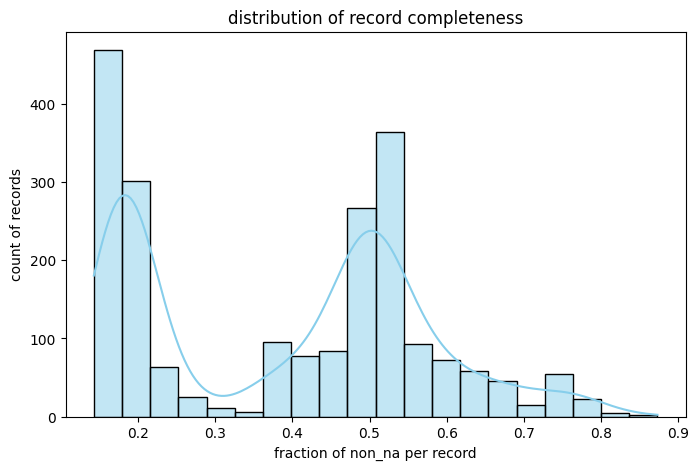

In [25]:
# plot distribution of records over completeness percentages
plt.figure(figsize = (8, 5))
sns.histplot(data["row_completeness"], bins = 20, kde = True, color = "skyblue")
plt.title("distribution of record completeness")
plt.xlabel("fraction of non_na per record")
plt.ylabel("count of records")
plt.show()

### Interpreting Record-Level Completeness

The histogram of record completeness shows a **multi-modal pattern**, meaning records cluster at different levels of completeness rather than forming a single smooth peak.

- **First peak (low completeness ≈ 0.1–0.2):** Many entries contain only minimal metadata such as agency name or use-case title.  
- **Trough around 0.3:** Few records sit in this middle ground—transition between near-empty and moderately complete submissions.  
- **Second peak (≈ 0.5–0.6):** Records that include metadata plus some governance or operational details; these are the main informative cases.  
- **Gradual decline after 0.7:** Fewer records are almost fully filled; only a small subset approaches complete reporting.

**Interpretation:**  
This pattern reflects different reporting behaviors across agencies—some provided only required fields, while others filled in substantial detail.  
A practical threshold such as **0.3 completeness** can be used to flag or drop extremely sparse records before modeling.


In [26]:
data["29_contains_pii"].isna().sum()

np.int64(1053)

## 🔍 Retention & Imputation Strategy — Justification

### 1. Retention Strategy

#### **Drop Columns with >80% Missingness**
- These fields are primarily governance and oversight variables with extremely sparse reporting.
- Retaining them would introduce noise and require imputation that does not reflect actual agency behavior.
- Since narrative fields provide the strongest signal for safety/rights classification, removing ultra-sparse fields improves dataset stability.

**Rationale:**  
> Governance fields are inconsistently reported across agencies. Modeling with them would fabricate structure where none exists and may distort risk patterns.

---

#### **Retain Rows with ≥40% Completeness**
- Record-level completeness exhibits a multi-modal distribution, with one cluster of highly sparse rows (<0.30) and one cluster of moderately complete rows (0.50–0.70).
- A threshold of **0.40** keeps the rows with meaningful narrative and context information while eliminating “empty” entries that cannot support modeling.

**Rationale:**  
> This threshold balances dataset integrity with adequate sample size, preserving agency diversity while ensuring enough content for reliable predictions.

---

### 2. Imputation Strategy

#### 🚫 **No Imputation for Narrative or Governance Fields**
- Narrative text cannot be meaningfully imputed without introducing artificial patterns into TF-IDF or other embeddings.
- Governance fields are too sparse; imputing them would create misleading impressions of governance maturity and distort model learning.
- Leaving these fields as missing values respects the true reporting behavior of federal agencies.

**Rationale:**  
> Imputing text or ultra-sparse governance fields risks injecting artificial signals, compromising model interpretability and policy trustworthiness.

---

### 3. Optional Minimal Imputation (Structured Categorical Only)
- For structured categorical fields with limited missingness, imputation with **"Unknown"** or the most frequent category is acceptable.
- This avoids dropping otherwise informative rows while maintaining semantic neutrality.

**Rationale:**  
> Limited categorical imputation helps preserve data without altering narrative meaning or governance characteristics.

---

### ✔ Final Position
The combined retention + minimal imputation strategy ensures that the modeling dataset reflects true reporting practices, preserves high-signal narrative fields, and avoids introducing artificial patterns that could bias safety/rights classification.


In [27]:
# 1) Calculate missingness per column
col_missing = data.isna().mean()

# 2) Identify columns with >80% missing
sparse_cols = col_missing[col_missing > 0.80].index.tolist()

# 3) Define important columns that must ALWAYS be kept
# (Based on your feature blueprint: narrative + governance + target)
protected_cols = [
    # Narrative (high-signal)
    '11_purpose_benefits',
    '12_outputs',
    '54_key_risks',

    # Governance (high-value risk signals)
    '52_impact_assessment',
    '56_monitor_postdeploy',
    '57_autonomous_impact',
    '55_independent_eval',
    '65_appeal_process',
    '62_disparity_mitigation',
    '63_stakeholder_consult',

    # Context (moderate-signal features)
    '8_topic_area',
    '16_dev_stage',
    '3_agency',
    '4_bureau',

    # Target variables
    '17_impact_type',
    '17_impact_type_clean'
]

# Keep only those that actually exist in the dataframe
protected_cols = [c for c in protected_cols if c in data.columns]

# 4) Exclude protected columns from being dropped
cols_to_drop = [c for c in sparse_cols if c not in protected_cols]

print("Dropping ultra-sparse columns:", cols_to_drop)

# 5) Apply the drop
data_reduced = data.drop(columns=cols_to_drop)

data_reduced.shape

Dropping ultra-sparse columns: ['8_question_type', '21_date_retired', '25_hisp_name', '26_public_service', '28_iqa_compliance', '31_question_type', '35_demo_features', '35_question_type', '39_code_link', '43_question_type', '47_question_type', '57_question_type', '53_real_world_testing', '59_question_type', '59_ai_notice', '63_question_type', '61_adverse_impact', '67_question_type', '66_no_appeal_reason', '67_opt_out', '47_question_type.1']


(2133, 43)

In [28]:
# Compute row completeness
row_completeness = data_reduced.notna().mean(axis=1)

# Keep rows with at least 40% non-missing values
threshold = 0.40
data_retained = data_reduced.loc[row_completeness >= threshold].copy()

print("Rows before:", data_reduced.shape[0])
print("Rows after retention:", data_retained.shape[0])

Rows before: 2133
Rows after retention: 1232


In [29]:
# 1) Identify all categorical columns
categorical_cols = data_retained.select_dtypes(include=["object", "category"]).columns.tolist()

# 2) Use your feature_categories mapping to find narrative text fields
narrative_fields = [
    col for col, category in feature_categories.items()
    if category == "Narrative (Text)" and col in data_retained.columns
]

print("Narrative fields (no imputation):", narrative_fields)

# 3) Categorical columns safe to impute (exclude narrative)
categorical_safe = [c for c in categorical_cols if c not in narrative_fields]

# Exclude target columns from imputation
target_cols = ["17_impact_type", "17_impact_type_clean"]
categorical_safe = [c for c in categorical_safe if c not in target_cols]

print("Final categorical columns safe to impute:", categorical_safe)

Narrative fields (no imputation): ['11_purpose_benefits', '12_outputs', '54_key_risks']
Final categorical columns safe to impute: ['2_use_case_name', '3_agency', '3_abr', '4_bureau', '8_topic_area', '10_commercial_ai', '16_dev_stage', '18_date_initiated', '19_date_acq_dev_began', '20_date_implemented', '22_dev_method', '23_contract_piids', '24_hisp_support', '27_public_info', '29_contains_pii', '30_saop_review', '31_data_catalog', '33_agency_data', '34_data_docs', '37_custom_code', '38_code_access', '40_has_ato', '41_system_name', '42_dev_tools_wait', '43_infra_provisioned', '45_compute_request', '47_timely_resources', '49_existing_reuse', '50_internal_review', '51_extension_request', '52_impact_assessment', '55_independent_eval', '56_monitor_postdeploy', '57_autonomous_impact', '62_disparity_mitigation', '63_stakeholder_consult', '65_appeal_process']


In [30]:
# 4) Impute only safe categorical columns with 'Unknown'
data_retained[categorical_safe] = data_retained[categorical_safe].fillna("Unknown")

In [31]:
final_data = data_retained.copy()
final_data.shape

(1232, 43)

In [32]:
print(final_data.columns)

Index(['2_use_case_name', '3_agency', '3_abr', '4_bureau', '8_topic_area',
       '10_commercial_ai', '11_purpose_benefits', '12_outputs', '16_dev_stage',
       '17_impact_type', '18_date_initiated', '19_date_acq_dev_began',
       '20_date_implemented', '22_dev_method', '23_contract_piids',
       '24_hisp_support', '27_public_info', '29_contains_pii',
       '30_saop_review', '31_data_catalog', '33_agency_data', '34_data_docs',
       '37_custom_code', '38_code_access', '40_has_ato', '41_system_name',
       '42_dev_tools_wait', '43_infra_provisioned', '45_compute_request',
       '47_timely_resources', '49_existing_reuse', '50_internal_review',
       '51_extension_request', '52_impact_assessment', '54_key_risks',
       '55_independent_eval', '56_monitor_postdeploy', '57_autonomous_impact',
       '62_disparity_mitigation', '63_stakeholder_consult',
       '65_appeal_process', '17_impact_type_clean', 'row_completeness'],
      dtype='object')


***

## 🧱 High-Level Pipeline Architecture

### 0. Data & Target (Completed)
- Input: `final_data`
- Text column: `text_clean`
- Target: `17_impact_type`
- Optional structured features: agency, topic area, lifecycle stage.

---

## 1. Classical ML Path (TF-IDF + Classifier)

**Goal:** Fast, reproducible, auditable classifier.

1. **Train/Validation/Test Split**
   - Stratified by `17_impact_type`.
   - Test set is frozen for all ML + LLM comparisons.

2. **Text Vectorization (TF-IDF)**
   - Fit `TfidfVectorizer` on `text_clean` (training only).
   - Transform train/val/test → sparse TF-IDF matrices.

3. **Baseline Classifier**
   - Logistic Regression or Linear SVM.
   - Optional: include selected structured fields.

4. **Model Selection & Calibration**
   - Metrics: macro-F1, class recall.
   - Optional: probability calibration (Platt scaling).

**Outputs:**
- `y_pred_ml`
- `p_ml`
- `tfidf_vectorizer`, `best_model`

---

## 2. LLM Path (Applied After Classical ML)

**Goal:** Provide interpretability, audit value, and handle low-confidence cases.

### LLM Inputs:
- `text_clean`
- Key metadata (agency, topic area, lifecycle stage)
- Optional: ML prediction + confidence

### Modes:
1. **Audit Mode**
   - LLM classifies a sample or disagreement cases.
   - Provides explanations.

2. **Low-Confidence Fallback**
   - If ML confidence < threshold (e.g., 0.6):
     - Send record to LLM for classification + rationale.

3. **Explanation Mode**
   - ML does the prediction.
   - LLM generates a human-readable rationale.

---

## 3. Combined Architecture Diagram

```text
               ┌────────────────────┐
               │  final_data        │
               │ (with text_clean   │
               │  + 17_impact_type) │
               └────────┬───────────┘
                        │
                        ▼
              [Train / Val / Test Split]
                        │
                        ▼
        ┌──────────────────────────────────┐
        │  TF-IDF Vectorizer (text_clean)  │
        └───────────────┬──────────────────┘
                        │
                        ▼
           Classical ML Classifier
          (LogReg / Linear SVM + optional
           structured features)
                        │
           y_pred_ml, p_ml, metrics
                        │
        ┌───────────────┴───────────────────┐
        │                                   │
        ▼                                   ▼
 Low-confidence / audit subset        All (or subset)
 sent to LLM with:                    sent to LLM for:
 - text_clean                         - explanations
 - key metadata                       - policy language
 - y_pred_ml + p_ml (optional)        
        │                                   │
        ▼                                   ▼
  LLM label + rationale          Natural language rationales
        │                                   │
        └───────────────┬───────────────────┘
                        ▼
          Final outputs (labels + explanations
          + performance comparison ML vs LLM)


***

In [33]:
import re

# 1️⃣ Get narrative fields from your feature_categories mapping
narrative_fields = [
    col for col, category in feature_categories.items()
    if category == "Narrative (Text)" and col in final_data.columns
]

print("Using these narrative text fields:", narrative_fields)

# 2️⃣ Combine narrative fields into a single raw text column
def combine_text_fields(row, cols):
    pieces = []
    for c in cols:
        val = row[c]
        if isinstance(val, str) and val.strip():
            pieces.append(val.strip())
    return " . ".join(pieces) if pieces else ""

# Overwrite or create text_combined_raw on final_data
final_data["text_combined_raw"] = final_data.apply(
    lambda r: combine_text_fields(r, narrative_fields),
    axis=1
)

# Quick sanity check
final_data[["text_combined_raw"]].head()


Using these narrative text fields: ['11_purpose_benefits', '12_outputs', '54_key_risks']


,text_combined_raw
0,"Utilizes AI/ML to generate high resolution, ra..."
1,CBP uses this tool to conduct targeted queries...
2,The system enhances CBP's capability to monito...
5,AAXI aims to address the problem of anomaly de...
43,To create efficiencies and unlock key insights...


In [34]:
# carry on basic cleaning on the text
def basic_clean(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text

final_data["text_clean"] = final_data["text_combined_raw"].apply(basic_clean)

final_data[["text_combined_raw", "text_clean"]].head()

,text_combined_raw,text_clean
0,"Utilizes AI/ML to generate high resolution, ra...","utilizes ai/ml to generate high resolution, ra..."
1,CBP uses this tool to conduct targeted queries...,cbp uses this tool to conduct targeted queries...
2,The system enhances CBP's capability to monito...,the system enhances cbp's capability to monito...
5,AAXI aims to address the problem of anomaly de...,aaxi aims to address the problem of anomaly de...
43,To create efficiencies and unlock key insights...,to create efficiencies and unlock key insights...


In [35]:
# Save final_data to CSV
final_data.to_csv("final_data_preprocessed.csv", index=False)

print("File saved as final_data_preprocessed.csv")

File saved as final_data_preprocessed.csv
